In [1]:
import numpy as np 
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
from tensorflow.keras.datasets import imdb
(X_tn0, y_tn0), (X_te0, y_test) = imdb.load_data(num_words=2000)

C:\Users\Jinyoung\.conda\envs\py3_7_6\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Jinyoung\.conda\envs\py3_7_6\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [4]:
X_train = X_tn0[0:20000]
print(X_train.shape)

(20000,)


In [5]:
y_train = y_tn0[0:20000]
print(y_train.shape)

(20000,)


In [6]:
X_valid = X_tn0[20000:25000]
print(X_valid.shape)

(5000,)


In [7]:
y_valid = y_tn0[20000:25000]
print(y_valid.shape)

(5000,)


In [8]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
# 개별 피처 크기 확인
# 문장 길이가 다르다는 걸 보여줌 => 같은 크기로 조정 필요
print(len(X_train[0]))
print(len(X_train[1]))

218
189


In [10]:
print(set(y_test))
print(len(set(y_test)))

{0, 1}
2


In [11]:
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=100) 
print(X_train.shape)

(20000, 100)


In [12]:
X_valid = sequence.pad_sequences(X_valid, maxlen=100) 
print(X_valid.shape)

(5000, 100)


In [13]:
X_test = sequence.pad_sequences(X_te0, maxlen=100) 
print(X_test.shape)

(25000, 100)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D


model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100))
model.add(Conv1D(50, kernel_size=3, 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         200000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 50)          15050     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 50)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 275,551
Trainable params: 275,551
Non-trainable params: 0
__________________________________________________

In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, y_train,
                batch_size=100,
                epochs=10, 
                validation_data = (X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 766us/sample - loss: 0.4885 - accuracy: 0.7470 - val_loss: 0.3967 - val_accuracy: 0.8236
Epoch 2/10
20000/20000 [==============================] - 13s 660us/sample - loss: 0.3383 - accuracy: 0.8528 - val_loss: 0.3719 - val_accuracy: 0.8316
Epoch 3/10
20000/20000 [==============================] - 13s 653us/sample - loss: 0.3005 - accuracy: 0.8747 - val_loss: 0.4116 - val_accuracy: 0.8054
Epoch 4/10
20000/20000 [==============================] - 12s 598us/sample - loss: 0.2619 - accuracy: 0.8944 - val_loss: 0.3895 - val_accuracy: 0.8274
Epoch 5/10
20000/20000 [==============================] - 13s 645us/sample - loss: 0.1973 - accuracy: 0.9278 - val_loss: 0.4320 - val_accuracy: 0.8212
Epoch 6/10
20000/20000 [==============================] - 11s 569us/sample - loss: 0.1341 - accuracy: 0.9528 - val_loss: 0.5046 - val_accuracy: 0.8150
Epoch 7/10
20000/20000 [=====================

In [18]:
print(model.evaluate(X_train, y_train)[1])

20000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
print(model.evaluate(X_valid, y_valid)[1])

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [20]:
print(model.evaluate(X_test, y_test)[1])

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [21]:
import numpy as np
epoch = np.arange(1, 11)
acc_train = hist.history['accuracy']
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_valid = hist.history['val_loss']

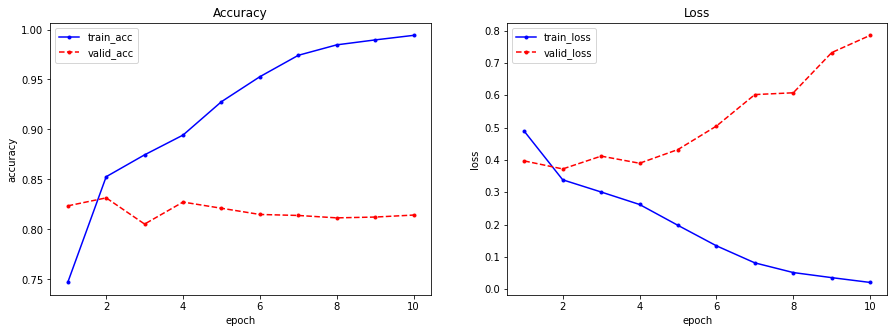

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(epoch, acc_train, 'b', 
         marker='.', 
         label='train_acc')
plt.plot(epoch, acc_valid, 'r--',
         marker='.',
         label='valid_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epoch, loss_train, 'b', 
         marker='.', 
         label='train_loss')
plt.plot(epoch, loss_valid, 'r--',
         marker='.', 
         label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()